In [4]:
#Importing packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

#Handle date time conversions matplotlib-pandas
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#Handling error from the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

#Font size configuration
sns.set(font_scale = 1.5, style = 'whitegrid')

In [7]:
path = os.path.join(et.io.HOME, 'earth-analytics','data')
os.chdir(path)

In [11]:
file_path = os.path.join('earthpy-downloads', 'colorado-flood',
                        'precipitation',
                        '805325-precip-daily-2003-2013.csv')

#Importing file as a panda dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


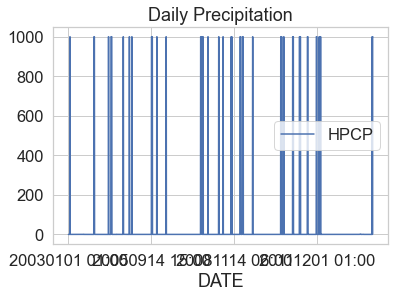

In [12]:
#Plotting the data
boulder_precip_2003_2013.plot(x='DATE',
                             y = 'HPCP',
                             title = 'Daily Precipitation')
plt.show()

In [15]:
boulder_precip_2003_2013['HPCP'].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [16]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [17]:
##Dealing with the no data and the datetime issues
#Importing data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                      parse_dates = ['DATE'],
                                      index_col = ['DATE'],
                                      na_values =['999.99'])
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [18]:
#summary
boulder_precip_2003_2013.describe() #La salida no incluye la columna indexada

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [19]:
##Accessing the index column
boulder_precip_2003_2013.index
#Se puede resetear el index utilizando .reset_index()

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

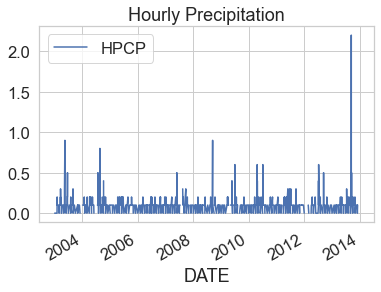

In [20]:
boulder_precip_2003_2013.plot(y = 'HPCP',
                             title='Hourly Precipitation')
plt.show()

In [21]:
##Subsetting data
precip_2005 = boulder_precip_2003_2013['2005']
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


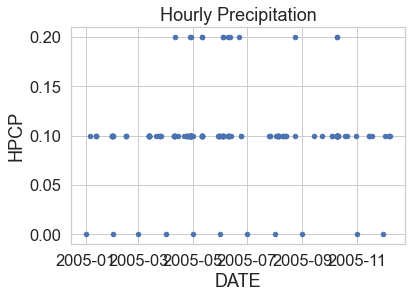

In [22]:
##Cleaning the data
precip_2005_clean = precip_2005.dropna()
precip_2005_clean.reset_index().plot(x = 'DATE',
                                    y = 'HPCP',
                                    title = 'Hourly Precipitation',
                                    kind = 'scatter')
plt.show()

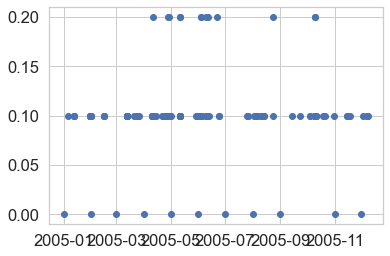

In [23]:
#Plot using matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_clean.index.values,
          y = precip_2005_clean['HPCP'])
plt.show()

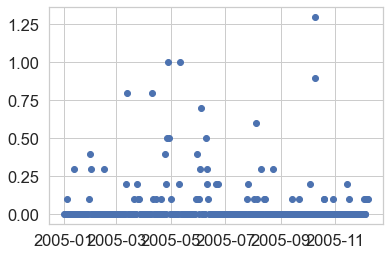

In [24]:
#Resample
precip_2005_daily = precip_2005.resample('D').sum()

#Plot
f, ax = plt.subplots()
ax.scatter(x=precip_2005_daily.index.values,
          y = precip_2005_daily['HPCP'])
plt.show()

In [28]:
##Multiple axes
#Data from 2012
precip_2012 = boulder_precip_2003_2013['2012'].dropna()
precip_2013 = boulder_precip_2003_2013['2013'].dropna()
precip_2012.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2012-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2012-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-02-23 03:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-02-23 05:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-03-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,


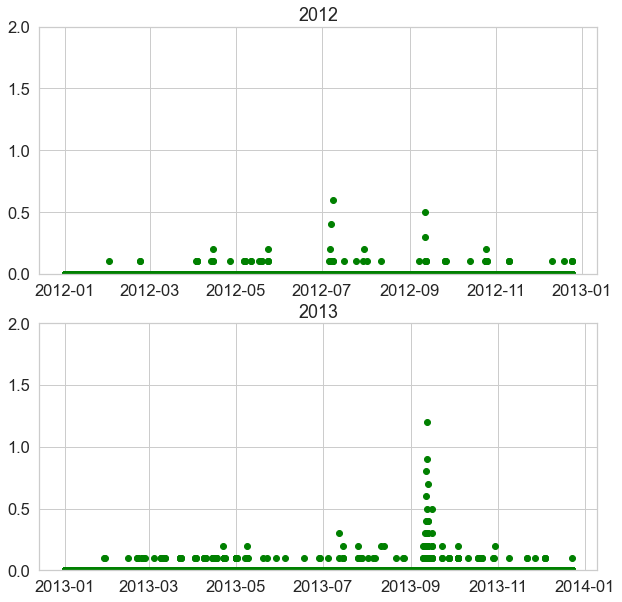

In [43]:
#Resampling
precip_2012_hourly = precip_2012.resample('h').sum()
precip_2013_hourly = precip_2013.resample('h').sum()

#Plot
f, (ax1, ax2) = plt.subplots(2,1, figsize = (10,10))
ax1.scatter(x = precip_2012_hourly.index.values,
           y = precip_2012_hourly['HPCP'],color='green')
ax1.set(ylim=[0,2],title='2012')
ax2.scatter(x = precip_2013_hourly.index.values,
           y= precip_2013_hourly['HPCP'],color='green')
ax2.set(ylim=[0,2],title='2013')
plt.show()

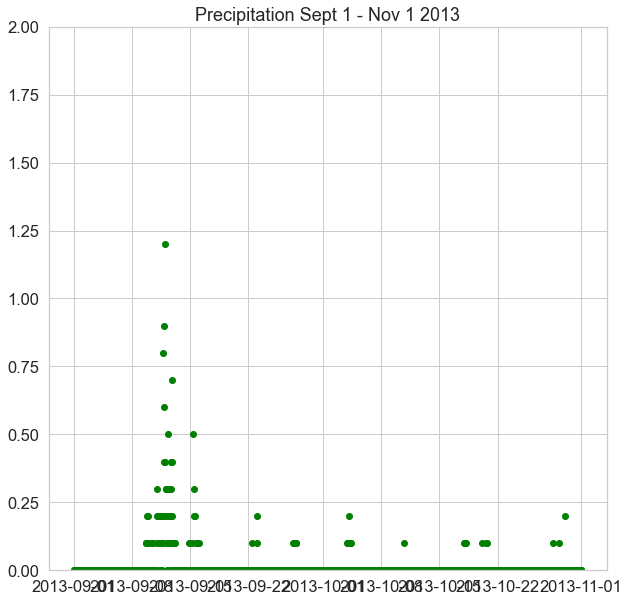

In [46]:
#Subset September to November
precip_sep_nov_2013 = boulder_precip_2003_2013['2013-09-01':'2013-11-01'].dropna()
precip_sep_nov_2013_hourly = precip_sep_nov_2013.resample('h').sum()

f, ax = plt.subplots(figsize = (10,10))
ax.scatter(x = precip_sep_nov_2013_hourly.index.values,
          y = precip_sep_nov_2013_hourly['HPCP'], color = 'green')
ax.set(ylim = [0,2], title='Precipitation Sept 1 - Nov 1 2013')
plt.show()

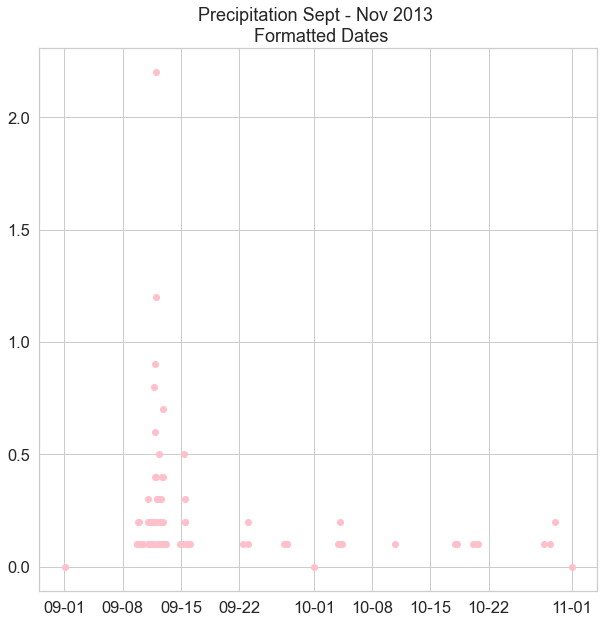

In [50]:
from matplotlib.dates import DateFormatter
flood_data = boulder_precip_2003_2013['2013-09-01':'2013-11-01']

f, ax = plt.subplots(figsize = (10,10))
ax.scatter(x = flood_data.index.values,
          y = flood_data['HPCP'],color= 'pink')

date_form = DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.set(title='Precipitation Sept - Nov 2013 \n Formatted Dates')
plt.show()